In [1]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("C:/Users/sindy/Downloads/cleaned_tweet_dataset.csv")

# Preview
df = df.dropna(subset=["tweet_text"])
df = df.reset_index(drop=True)
df.head()


,tweet_id,tweet_text,label
0,1.311162e+18,"1311162417938919424,""imma keep it real with y’...",NaN
1,1.299361e+18,"1299361296400429057,""@USER guess the #cult45 #...",NaN
2,1.239351e+18,"1239350672782483456,""joe “let’s be reasonable ...",NaN
3,1.299022e+18,"1299022276571140099,""pelosi says biden shouldn...",NaN
4,NaN,HTTP,NaN


In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download VADER Lexicon
nltk.download('vader_lexicon')

# Initialize sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Define function to get sentiment category
def get_sentiment(text):
    score = sid.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment analysis
df['sentiment'] = df['tweet_text'].apply(get_sentiment)
df[['tweet_text', 'sentiment']].head()


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\sindy\AppData\Roaming\nltk_data...


,tweet_text,sentiment
0,"1311162417938919424,""imma keep it real with y’...",Neutral
1,"1299361296400429057,""@USER guess the #cult45 #...",Neutral
2,"1239350672782483456,""joe “let’s be reasonable ...",Neutral
3,"1299022276571140099,""pelosi says biden shouldn...",Neutral
4,HTTP,Neutral


C:\Users\sindy\AppData\Local\Temp\ipykernel_8532\3163063834.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


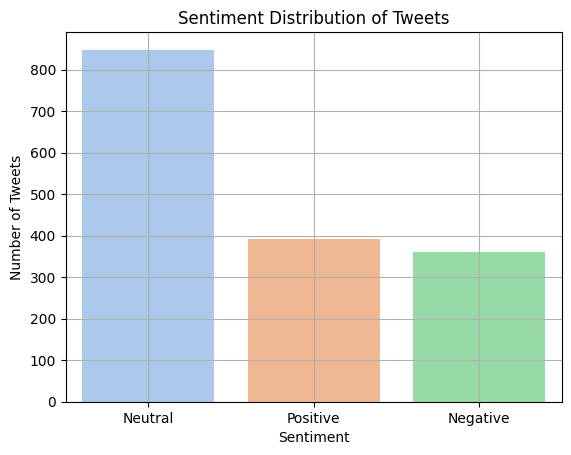

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot sentiment count
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.grid(True)
plt.show()


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Create the vectorizer
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')

# Apply TF-IDF to tweet text
X = vectorizer.fit_transform(df['tweet_text'])


In [5]:
from sklearn.model_selection import train_test_split

# Target variable
y = df['sentiment']

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


In [6]:
from sklearn.linear_model import LogisticRegression

# Initialize and train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

Classification Report:

              precision    recall  f1-score   support

    Negative       0.60      0.17      0.26        72
     Neutral       0.61      0.95      0.74       170
    Positive       0.65      0.28      0.39        79

    accuracy                           0.61       321
   macro avg       0.62      0.47      0.46       321
weighted avg       0.62      0.61      0.55       321



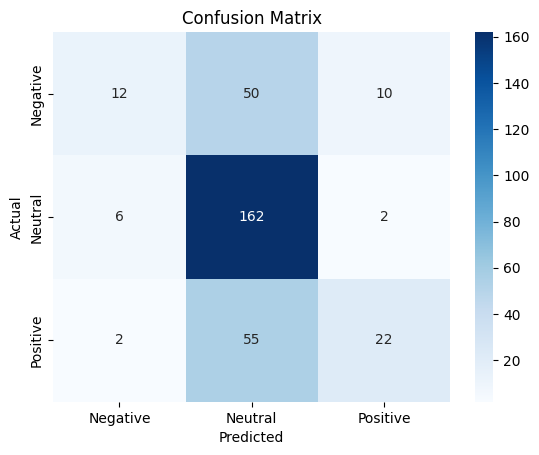

In [7]:
from sklearn.metrics import classification_report, confusion_matrix

# Predict on test set
y_pred = model.predict(X_test)

# Print evaluation report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Optional: Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [8]:
pip install imbalanced-learn


   ---------------------------------------- 0.0/238.4 kB ? eta -:--:--
   - -------------------------------------- 10.2/238.4 kB ? eta -:--:--
   --- ----------------------------------- 20.5/238.4 kB 640.0 kB/s eta 0:00:01
   -------------------- ------------------- 122.9/238.4 kB 1.2 MB/s eta 0:00:01
   ---------------------------------------- 238.4/238.4 kB 1.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

# Vectorize again
vectorizer = TfidfVectorizer(max_features=5000, stop_words='english')
X = vectorizer.fit_transform(df['tweet_text'])
y = df['sentiment']

# Apply SMOTE on the feature matrix and labels
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)


In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Split again (new balanced data)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Report
print("Classification Report After SMOTE:\n")
print(classification_report(y_test, y_pred))


Classification Report After SMOTE:

              precision    recall  f1-score   support

    Negative       0.77      0.86      0.81       183
     Neutral       0.77      0.70      0.74       168
    Positive       0.82      0.79      0.80       158

    accuracy                           0.79       509
   macro avg       0.79      0.78      0.78       509
weighted avg       0.79      0.79      0.78       509



C:\Users\sindy\AppData\Local\Temp\ipykernel_8532\1856743099.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', palette='pastel')


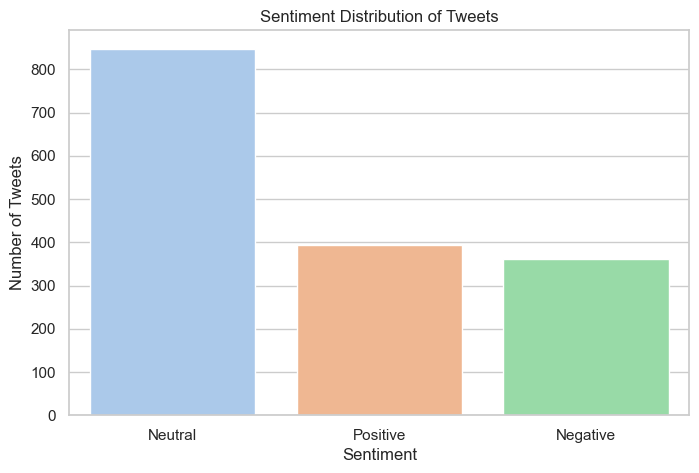

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='sentiment', palette='pastel')
plt.title("Sentiment Distribution of Tweets")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()


In [18]:
pip install wordcloud


   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   ---------------------------------------- 0.0/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/301.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/301.2 kB 163.8 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/301.2 kB 178.6 kB/s eta 0:00:02
   ----------- --------------------------- 92.2/301.2 kB 350.1 kB/s eta 0:00:01
   --------------------- ---------------- 174.1/301.2 kB 583.1 kB/s eta 0:00:01
   -------------------------------------  297.0/301.2 kB 874.1 kB/s eta 0:00:01
   -------------------------------------- 301.2/301.2 kB 845.8 kB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [19]:
from wordcloud import WordCloud


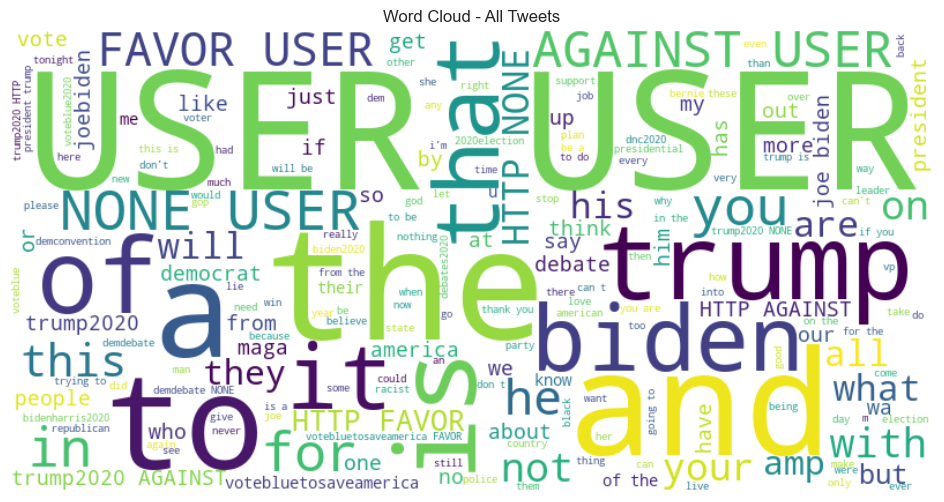

In [20]:
import matplotlib.pyplot as plt

# Combine all tweet text
all_text = ' '.join(df['tweet_text'].dropna())

# Generate and plot word cloud
wc = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud - All Tweets")
plt.show()


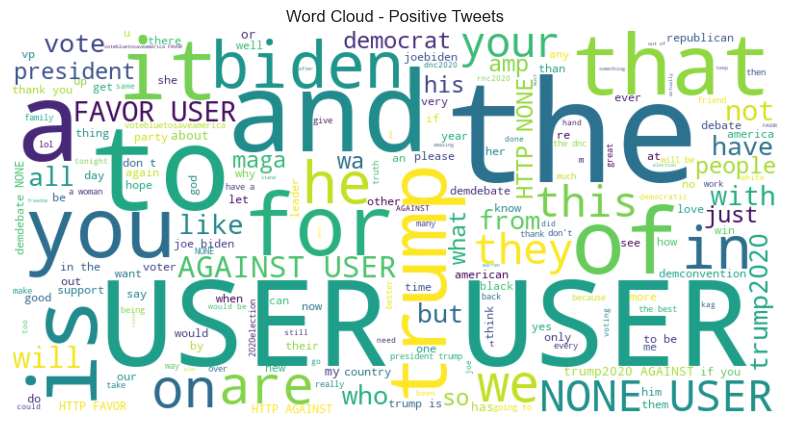

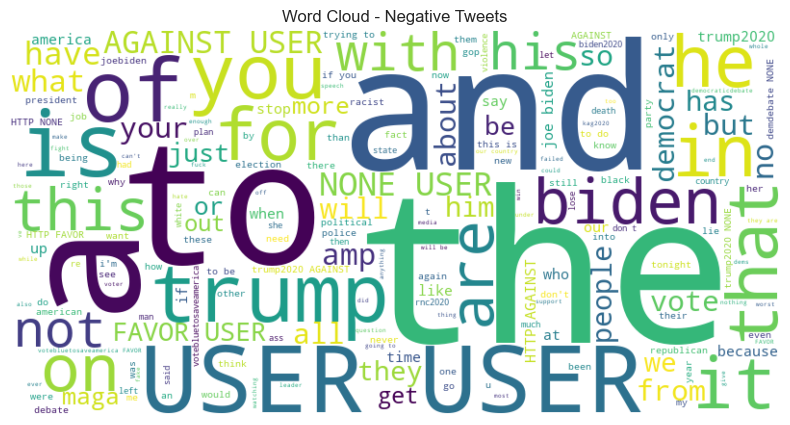

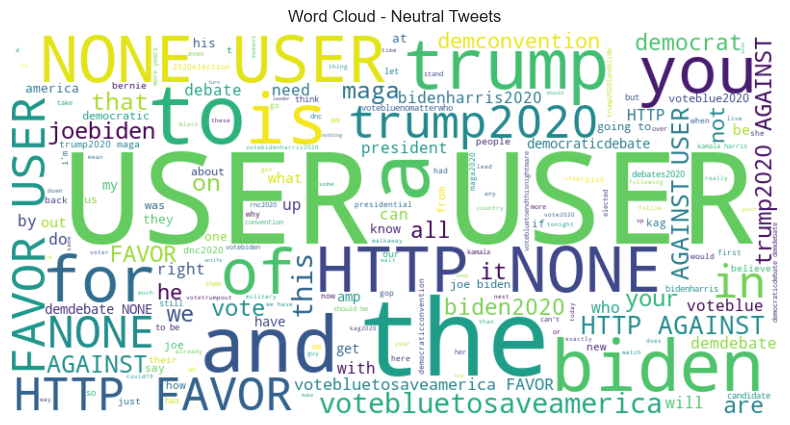

In [21]:
# Function to generate word cloud per sentiment
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_sentiment_wordcloud(sentiment):
    text = ' '.join(df[df['sentiment'] == sentiment]['tweet_text'].dropna())
    wc = WordCloud(width=800, height=400, background_color='white', stopwords='english').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud - {sentiment} Tweets")
    plt.show()

# Generate for all three sentiments
plot_sentiment_wordcloud('Positive')
plot_sentiment_wordcloud('Negative')
plot_sentiment_wordcloud('Neutral')
